In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_img(img, figsize=(10, 6), cmap=None):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')

In [3]:
# specify path to the dataset
root_dir = "/beegfs/home/d.kuznedelev/Datasets/Intel_Image_Classification"

train_dir = f"{root_dir}/seg_train/seg_train"
val_dir   = f"{root_dir}/seg_pred/seg_pred"
test_dir  = f"{root_dir}/seg_test/seg_test"

In [4]:
# read some random image
img = cv2.imread(f'{train_dir}/sea/10016.jpg')
# BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

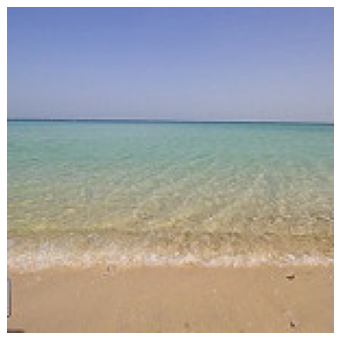

In [5]:
show_img(img);

### Run K-Means clustering for segmentation
---

In [6]:
import time

In [10]:
# reshape image to (N, 3)
img_flat = img.reshape((-1,3)).astype(np.float32)

# define K-Means parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

# sought range of number of clusters
Ks = range(2, 20)
rets = []

for K in Ks:
    start = time.time()
    ret, label, center=cv2.kmeans(img_flat, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    end = time.time()
    rets.append(ret)
    print(f"K-Means clustering with cluster size of {K:<2} took {end - start:.3f} seconds") 

K-Means clustering with cluster size of 2  took 0.046 seconds
K-Means clustering with cluster size of 3  took 0.056 seconds
K-Means clustering with cluster size of 4  took 0.075 seconds
K-Means clustering with cluster size of 5  took 0.092 seconds
K-Means clustering with cluster size of 6  took 0.103 seconds
K-Means clustering with cluster size of 7  took 0.121 seconds
K-Means clustering with cluster size of 8  took 0.132 seconds
K-Means clustering with cluster size of 9  took 0.149 seconds
K-Means clustering with cluster size of 10 took 0.159 seconds
K-Means clustering with cluster size of 11 took 0.177 seconds
K-Means clustering with cluster size of 12 took 0.186 seconds
K-Means clustering with cluster size of 13 took 0.206 seconds
K-Means clustering with cluster size of 14 took 0.219 seconds
K-Means clustering with cluster size of 15 took 0.235 seconds
K-Means clustering with cluster size of 16 took 0.254 seconds
K-Means clustering with cluster size of 17 took 0.282 seconds
K-Means 

### Determine optimal number of clusters from the elbow method
---

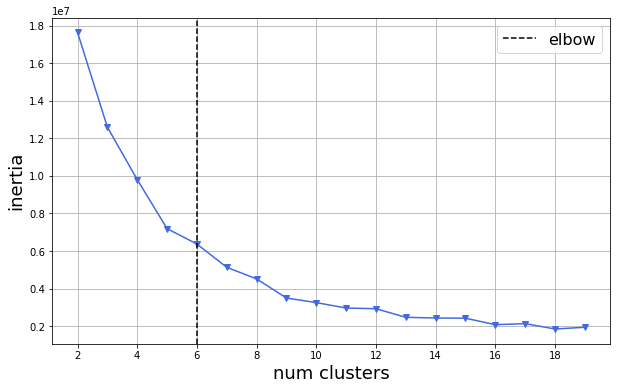

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(range(0, 20, 2))
ax.plot(Ks, rets, 'v-', color='royalblue')
ax.axvline(6, color='k', linestyle='--', label="elbow")
ax.grid()
ax.set_xlabel("num clusters", fontsize=18)
ax.set_ylabel("inertia", fontsize=18)

ax.legend(fontsize=16)

From here we see, that likely that 6 is the reasonable number of clusters.
Let us visualize the segmentation.

In [82]:
def get_random_colors(n_colors):
    return np.random.randint(low=0, high=256, size=(n_colors, 3))

In [14]:
ret, label, center=cv2.kmeans(img_flat, 6, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
colors = get_random_colors(K)
res = colors[label.flatten()]
result_img = res.reshape((img.shape))

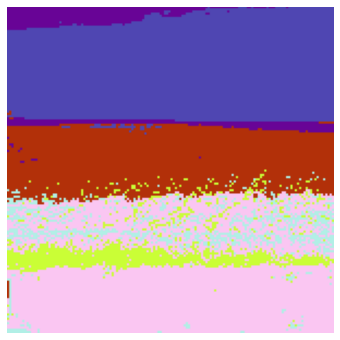

In [15]:
show_img(result_img)

Segmentation seems to be quite reasonable. However it is rather noisy.

In [53]:
# process annotations

In [17]:
import os
from sklearn.cluster import KMeans

In [55]:
annotation_dir = '../Datasets/Intel_Image_Classification/annotations'

In [56]:
clusters = []

print("Collecting clusters on the training dataset", flush=True)
print("-" * 10, flush=True)
for category in os.listdir(f"{annotation_dir}/train"):
    for file_name in os.listdir(f"{annotation_dir}/train/{category}"):
        if 'clusters' in file_name:
            image_clusters = np.load(f"{annotation_dir}/train/{category}/{file_name}")
            clusters.append(image_clusters)
# concatenate the clusters
clusters = np.concatenate(clusters, axis=0)

----------


In [10]:
Ks = np.arange(10, 110, 10)
rets = []

for K in Ks:
    print("K", K, flush=True)
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(clusters)
    rets.append(kmeans.inertia_)

K 10
K 20
K 30
K 40
K 50
K 60
K 70
K 80
K 90
K 100


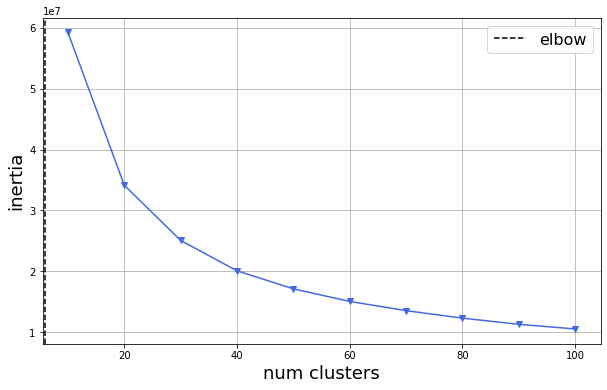

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.set_xticks(range(0, 20, 2))
ax.plot(Ks, rets, 'v-', color='royalblue')
ax.axvline(40, color='k', linestyle='--', label="elbow")
ax.grid()
ax.set_xlabel("num clusters", fontsize=18)
ax.set_ylabel("inertia", fontsize=18)

ax.legend(fontsize=16)

Optimal number of clusters is 40